In [728]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import math

In [729]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
#keeping the original variable separate
housing_test  = test.copy()
housing_train  = train.copy()

In [730]:
housing_train.shape, housing_test.shape

((1460, 81), (1459, 80))

In [731]:
housing_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

#### 81 columns 
#### for final testing "sale price" and "id" will not be there 
#### so 79 features 

In [732]:
housing_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

Now, we will be dropping the "Id" column as it not useful in any way to our model

In [733]:
housing_train.drop(['Id'], axis=1, inplace=True)
housing_test.drop(['Id'], axis=1, inplace=True)

In [734]:
housing_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [735]:
outliers = [30, 88, 462, 631, 1322]
housing_train = housing_train.drop(train.index[outliers])

In [736]:
# some of the outliers in the data were already given, so we removed them

In [737]:
# by doing this we will concatenate the train and test dataset so that we can
#handle missing values at the same time 
#and after we are done, we can separate 
housing_train['train']  = 1
housing_test['train']  = 0
df_initial = pd.concat([housing_train, housing_test], axis=0,sort=False)

In [738]:
df_initial

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1

In [739]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2914 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2914 non-null   int64  
 1   MSZoning       2910 non-null   object 
 2   LotFrontage    2428 non-null   float64
 3   LotArea        2914 non-null   int64  
 4   Street         2914 non-null   object 
 5   Alley          197 non-null    object 
 6   LotShape       2914 non-null   object 
 7   LandContour    2914 non-null   object 
 8   Utilities      2912 non-null   object 
 9   LotConfig      2914 non-null   object 
 10  LandSlope      2914 non-null   object 
 11  Neighborhood   2914 non-null   object 
 12  Condition1     2914 non-null   object 
 13  Condition2     2914 non-null   object 
 14  BldgType       2914 non-null   object 
 15  HouseStyle     2914 non-null   object 
 16  OverallQual    2914 non-null   int64  
 17  OverallCond    2914 non-null   int64  
 18  YearBuil

In [740]:
# Since these column are actually a category , using a numerical number will lead the model to assume
# that it is numerical , so we convert to string .
df_initial['MSSubClass'] = df_initial['MSSubClass'].apply(str)
df_initial['YrSold'] = df_initial['YrSold'].astype(str)
df_initial['MoSold'] = df_initial['MoSold'].astype(str)

In [741]:
# the following code is taken from forums, 
# cleaner way to print the percentage of missing values 
missing_values = [(var, df_initial[var].isna().mean()*100) for var in df_initial]
missing_values = pd.DataFrame(missing_values, columns=["Feature", "Percentage_of_Missing_Values"])
missing_values = missing_values[missing_values.Percentage_of_Missing_Values > 1]
missing_values.sort_values("Percentage_of_Missing_Values", ascending=False)

,Feature,Percentage_of_Missing_Values
71,PoolQC,99.656829
73,MiscFeature,96.396706
5,Alley,93.239533
72,Fence,80.507893
79,SalePrice,50.068634
56,FireplaceQu,48.661633
2,LotFrontage,16.678106
58,GarageYrBlt,5.422100
59,GarageFinish,5.422100
62,GarageQual,5.422100


In [742]:
## The top 4 features, have almost all there values as null (>80%)
# there way no way we can fill the missing values without incurring significant errors 
#Even if we give none, the result will be a heavy tailed feature. 
#therefore we will just remove these feature from train and test 

In [743]:
df_initial = df_initial.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [744]:
# to better visualize we will separate categorical and numerical features 
df_initial.shape

(2914, 77)

In [745]:
categorical_columns = df_initial.select_dtypes(include=['object'])
numerical_columns =df_initial.select_dtypes(exclude=['object'])

In [746]:
numerical_columns.shape,categorical_columns.shape

((2914, 35), (2914, 42))

In [747]:
#checking the null values in categorical columns 
print(categorical_columns.isnull().sum().sort_values(ascending=False))

FireplaceQu      1418
GarageCond        158
GarageQual        158
GarageFinish      158
GarageType        156
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
KitchenQual         1
Exterior2nd         1
Electrical          1
Exterior1st         1
SaleType            1
Neighborhood        0
LandSlope           0
Condition1          0
SaleCondition       0
LotConfig           0
BldgType            0
LandContour         0
LotShape            0
Street              0
Condition2          0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
ExterQual           0
ExterCond           0
Heating             0
HeatingQC           0
CentralAir          0
PavedDrive          0
MoSold              0
YrSold              0
MSSubClass          0
dtype: int64


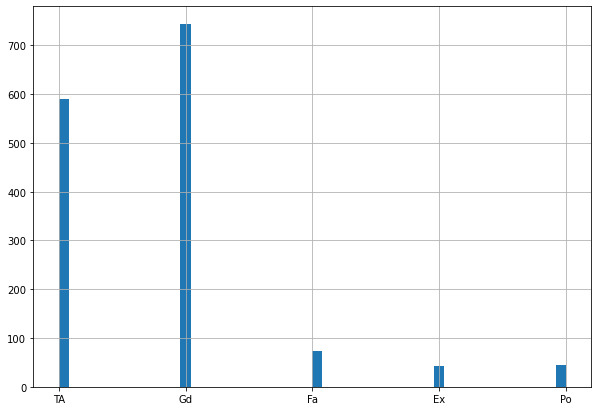

In [748]:
categorical_columns['FireplaceQu'].hist(bins=50, figsize=(10,7))

In [749]:
#1
# we can se fireplace qu- 48% data is missing 
# most of the fireplaces are either good or average and hardly any are excellent or poor 
# we will fill missing data with average condition rather than giving none 
categorical_columns['FireplaceQu']= categorical_columns['FireplaceQu'].fillna('TA')

<ipython-input-749-1fdb019da389>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['FireplaceQu']= categorical_columns['FireplaceQu'].fillna('TA')


In [750]:
#5
# we can see from missing values that garage condition,quality, finish all have same number of missing values 
#indicating that there might be no garage
# so we will give none here 
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    categorical_columns[col] = categorical_columns[col].fillna('None')

<ipython-input-750-a8e9840dccef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns[col] = categorical_columns[col].fillna('None')


In [751]:
#10
# same goes for basement related features 
# around 80 values missing for these features indicating no basement possibility
for cols in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    categorical_columns[cols] = categorical_columns[cols].fillna('None')

<ipython-input-751-8eed6b1936d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns[cols] = categorical_columns[cols].fillna('None')


In [752]:
#11
#most common type is none , so replace is it with none
categorical_columns['MasVnrType']= categorical_columns['MasVnrType'].fillna('None')

<ipython-input-752-576fb332cef5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['MasVnrType']= categorical_columns['MasVnrType'].fillna('None')


In [753]:
#19
#few values replace it with mode
categorical_columns['MSZoning']= categorical_columns['MSZoning'].fillna('RL')
categorical_columns['Functional']= categorical_columns['Functional'].fillna('Typ')
categorical_columns['Utilities']= categorical_columns['Utilities'].fillna('AllPub')
categorical_columns['Electrical']= categorical_columns['Electrical'].fillna('SBrkr')
categorical_columns['SaleType']= categorical_columns['SaleType'].fillna('WD')
categorical_columns['KitchenQual']= categorical_columns['KitchenQual'].fillna(categorical_columns['KitchenQual'].mode().iloc[0])
categorical_columns['Exterior1st']= categorical_columns['Exterior1st'].fillna(categorical_columns['Exterior1st'].mode().iloc[0])
categorical_columns['Exterior2nd']= categorical_columns['Exterior2nd'].fillna(categorical_columns['Exterior2nd'].mode().iloc[0])

<ipython-input-753-342d01d5813b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['MSZoning']= categorical_columns['MSZoning'].fillna('RL')
<ipython-input-753-342d01d5813b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['Functional']= categorical_columns['Functional'].fillna('Typ')
<ipython-input-753-342d01d5813b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [754]:
#no missing values in categorical values 
print(categorical_columns.isnull().sum().sort_values(ascending=False))

SaleCondition    0
Condition2       0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition1       0
SaleType         0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
MSZoning         0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
YrSold           0
MoSold           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
FireplaceQu      0
Functional       0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
MSSubClass       0
dtype: int64


We Are Done with Categorical Feature
#### now the Numerical Feature

In [755]:
#checking the null values in numerical columns 
print(numerical_columns.isnull().sum().sort_values(ascending=False))

SalePrice        1459
LotFrontage       486
GarageYrBlt       158
MasVnrArea         23
BsmtHalfBath        2
BsmtFullBath        2
BsmtFinSF1          1
GarageArea          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
GarageCars          1
YearRemodAdd        0
YearBuilt           0
LowQualFinSF        0
OverallCond         0
1stFlrSF            0
2ndFlrSF            0
OverallQual         0
LotArea             0
train               0
GrLivArea           0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
FullBath            0
dtype: int64


In [756]:
# sale price can be ignored as we have to predict that in out final submission 

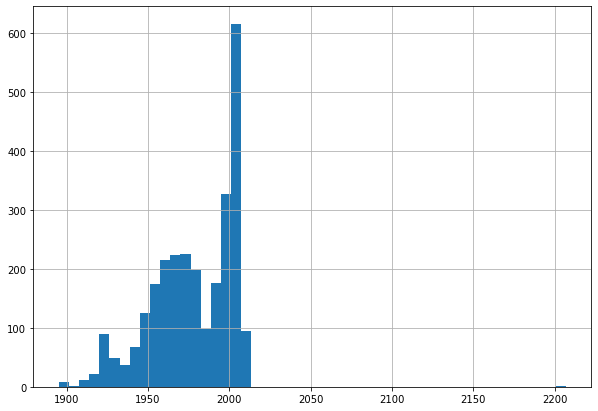

In [757]:
# now we have 11 features with missing values 
# we will tackle garageYrBLT first 
numerical_columns['GarageYrBlt'].hist(bins=50, figsize=(10,7))

In [758]:
display(numerical_columns.loc[numerical_columns['GarageYrBlt'] > 2050])

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,train
1132,68.0,8298,8,5,2006,2007,NaN,583.0,0.0,963.0,1546.0,1564,0,0,1564,0.0,0.0,2,0,2,1,6,1,2207.0,2.0,502.0,132,0,0,0,0,0,0,NaN,0


In [759]:
#outlier exist which is definitely wrong, but cant delete it as it is from test set (train =0 means test)

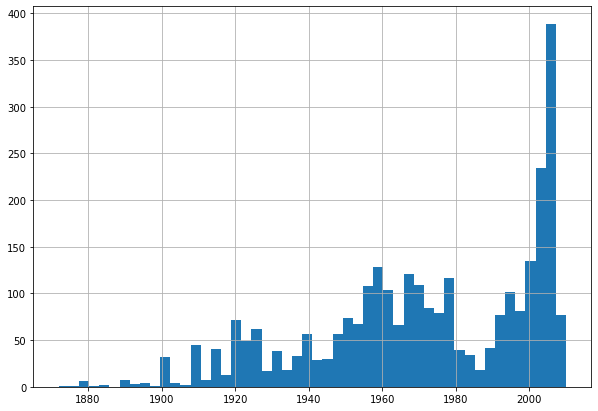

In [760]:
numerical_columns['YearBuilt'].hist(bins=50, figsize=(10,7))

In [761]:
# from the above plot we can see that most of the houses are fairly new and these having no garages is
#highly unlikely given 95% of the houses have garages  
# so we will assign garage year built to the year when the house were actually built 
# which checks out with comparison on random houses as most houses year built and garage year built are same 

In [762]:
numerical_columns[['YearBuilt','GarageYrBlt']].head(50)

,YearBuilt,GarageYrBlt
0,2003,2003.0
1,1976,1976.0
2,2001,2001.0
3,1915,1998.0
4,2000,2000.0
5,1993,1993.0
6,2004,2004.0
7,1973,1973.0
8,1931,1931.0
9,1939,1939.0


In [763]:
numerical_columns['GarageYrBlt'] = numerical_columns['GarageYrBlt'].fillna(numerical_columns['YearBuilt'])

<ipython-input-763-466dba6ef0f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_columns['GarageYrBlt'] = numerical_columns['GarageYrBlt'].fillna(numerical_columns['YearBuilt'])


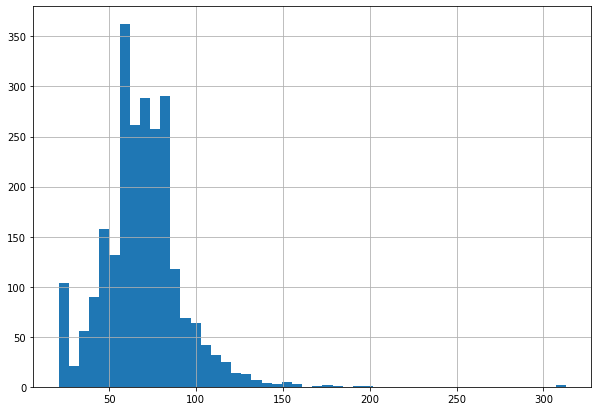

In [764]:
# we can see that lot frontage has some outliers
# so intead of mean we will give median which may mitigate some noise
numerical_columns['LotFrontage'].hist(bins=50, figsize=(10,7))

In [765]:
numerical_columns['LotFrontage'].describe()

count    2428.000000
mean       69.301895
std        23.330111
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [766]:
numerical_columns['LotFrontage']= numerical_columns['LotFrontage'].fillna(numerical_columns['LotFrontage'].median())

<ipython-input-766-39655bfe1988>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_columns['LotFrontage']= numerical_columns['LotFrontage'].fillna(numerical_columns['LotFrontage'].median())


In [767]:
# most of the house have area as zero
# few missing values so we will change this with either mean or median 
numerical_columns['MasVnrArea']= numerical_columns['MasVnrArea'].fillna(numerical_columns['MasVnrArea'].median())
numerical_columns['BsmtHalfBath']= numerical_columns['BsmtHalfBath'].fillna(numerical_columns['BsmtHalfBath'].mode().iloc[0])
numerical_columns['BsmtFullBath']= numerical_columns['BsmtFullBath'].fillna(numerical_columns['BsmtFullBath'].mode().iloc[0])
numerical_columns['BsmtFinSF2']= numerical_columns['BsmtFinSF2'].fillna(numerical_columns['BsmtFinSF2'].mode().iloc[0])
numerical_columns['BsmtFinSF1']= numerical_columns['BsmtFinSF1'].fillna(numerical_columns['BsmtFinSF1'].mode().iloc[0])
numerical_columns['BsmtUnfSF']= numerical_columns['BsmtUnfSF'].fillna(numerical_columns['BsmtUnfSF'].mode().iloc[0])
numerical_columns['TotalBsmtSF']= numerical_columns['TotalBsmtSF'].fillna(numerical_columns['TotalBsmtSF'].mode().iloc[0])
numerical_columns['GarageArea']= numerical_columns['GarageArea'].fillna(numerical_columns['GarageArea'].mean())
numerical_columns['GarageCars']= numerical_columns['GarageCars'].fillna(numerical_columns['GarageCars'].median())

<ipython-input-767-73a3002b9082>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_columns['MasVnrArea']= numerical_columns['MasVnrArea'].fillna(numerical_columns['MasVnrArea'].median())
<ipython-input-767-73a3002b9082>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_columns['BsmtHalfBath']= numerical_columns['BsmtHalfBath'].fillna(numerical_columns['BsmtHalfBath'].mode().iloc[0])
<ipython-input-767-73a3002b9082>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [768]:
#checking the null values in numerical columns  again 
print(numerical_columns.isnull().sum().sort_values(ascending=False))

SalePrice        1459
BsmtHalfBath        0
BsmtFullBath        0
GrLivArea           0
LowQualFinSF        0
2ndFlrSF            0
1stFlrSF            0
TotalBsmtSF         0
BsmtUnfSF           0
train               0
BsmtFinSF1          0
MasVnrArea          0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
OverallQual         0
LotArea             0
BsmtFinSF2          0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt         0
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
LotFrontage         0
dtype: int64


In [769]:
# now we have no missing values in our numerical data 
# except sale price , which can be ignored 


#### Analysing some Categorical Features

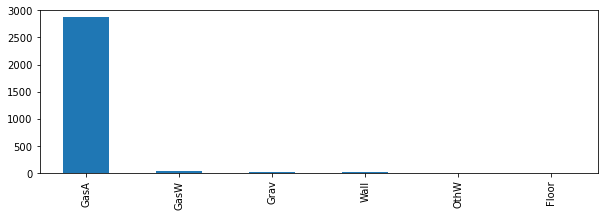

In [770]:
#analysing some skewed data 
categorical_columns['Heating'].value_counts().plot(kind='bar',figsize=[10,3])


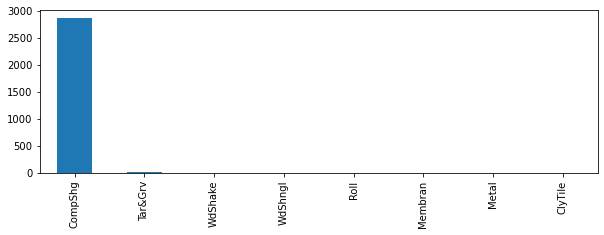

In [771]:
categorical_columns['RoofMatl'].value_counts().plot(kind='bar',figsize=[10,3])


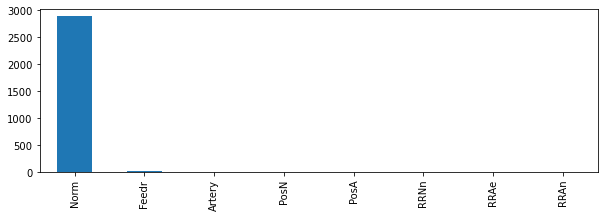

In [772]:
categorical_columns['Condition2'].value_counts().plot(kind='bar',figsize=[10,3])


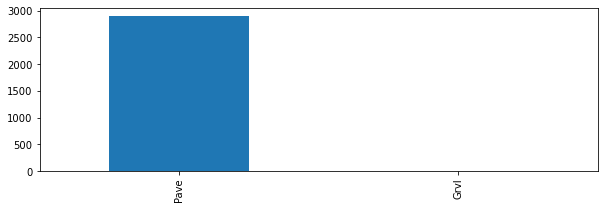

In [773]:
categorical_columns['Street'].value_counts().plot(kind='bar',figsize=[10,3])


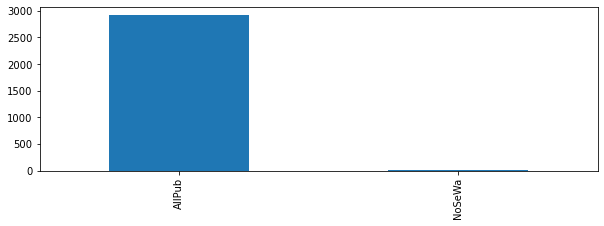

In [774]:
categorical_columns['Utilities'].value_counts().plot(kind='bar',figsize=[10,3])

### These features are hight skewed , So can be dropped 

In [775]:
categorical_columns_clean = categorical_columns.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

In [776]:
checking_skewness = numerical_columns.skew().sort_values(ascending=False)
checking_skewness = checking_skewness[abs(checking_skewness) > 0.5]
checking_skewness

MiscVal          21.939679
PoolArea         16.892395
LotArea          12.821044
LowQualFinSF     12.402261
3SsnPorch        11.371955
KitchenAbvGr      4.300206
BsmtFinSF2        4.149704
EnclosedPorch     4.033190
ScreenPorch       3.944742
BsmtHalfBath      3.929621
MasVnrArea        2.612383
OpenPorchSF       2.534884
SalePrice         1.892297
WoodDeckSF        1.844116
LotFrontage       1.681393
1stFlrSF          1.470583
BsmtFinSF1        1.425647
GrLivArea         1.270356
TotalBsmtSF       1.157048
BsmtUnfSF         0.921396
2ndFlrSF          0.862472
TotRmsAbvGrd      0.758059
Fireplaces        0.734643
HalfBath          0.693795
BsmtFullBath      0.623920
OverallCond       0.580050
YearBuilt        -0.600853
dtype: float64

### Dropping features with very high skewness 

In [777]:
numerical_columns_clean = numerical_columns.drop(['PoolArea','3SsnPorch','MasVnrArea','OpenPorchSF','LotArea','LowQualFinSF'
                                   ,'2ndFlrSF'],axis=1)

In [778]:
# concatenating our numerical and categorical values 
df_cleaned = pd.concat([categorical_columns_clean, numerical_columns_clean], axis=1,sort=False)
df_cleaned

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice,train
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,2,2008,WD,Normal,65.0,7,5,2003,2003,706.0,0.0,150.0,856.0,856,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,0,0,0,208500.0,1
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,5,2007,WD,Normal,80.0,6,8,1976,1976,978.0,0.0,284.0,1262.0,1262,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,181500.0,1
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,9,2008,WD,Normal,68.0,7,5,2001,2002,486.0,0.0,434.0,920.0,920,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,0,0,0,223500.0,1
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,2,2006,WD,Abnorml,60.0,7,5,1915,1970,216.0,0.0,540.0,756.0,961,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,272,0,0,140000.0,1
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,12,2008,WD,Normal,84.0,8,5,2000,2000,655.0,0.0,490.0,1145.0,1145,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,0,0,0,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,Gable,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,Gd,Y,SBrkr,TA,Typ,TA,None,None,None,None,Y,6,2006,WD,Normal,21.0,4,7,1970,1970,0.0,0.0,546.0,546.0,546,1092,0.0,0.0,1,1,3,1,5,0,1970.0,0.0,0.0,0,0,0,0,NaN,0
1455,160,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,Gable,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,TA,Y,SBrkr,TA,Typ,TA,CarPort,Unf,TA,TA,Y,4,2006,WD,Abnorml,21.0,4,5,1970,1970,252.0,0.0,294.0,546.0,546,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,0,0,0,NaN,0
1456,20,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,9,2006,WD,Abnorml,160.0,5,7,1960,1996,1224.0,0.0,0.0,1224.0,1224,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,NaN,0
1457,85,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,SFoyer,Gable,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,TA,Y,SBrkr,TA,Typ,TA,None,None,None,None,Y,7,2006,WD,Normal,62.0,5,5,1992,1992,337.0,0.0,575.0,912.0,970,970,0.0,1.0,1,0,3,1,6,0,1992.0,0.0,0.0,80,0,0,700,NaN,0


In [779]:
# converting categorical to numerical features

In [780]:
df_cleaned_encoded = pd.get_dummies(df_cleaned).reset_index(drop=True)
df_cleaned_encoded.shape

(2914, 283)

In [781]:
df_cleaned_encoded

,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice,train,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,...,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,7,5,2003,2003,706.0,0.0,150.0,856.0,856,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,0,0,0,208500.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,6,8,1976,1976,978.0,0.0,284.0,1262.0,1262,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,181500.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,68.0,7,5,2001,2002,486.0,0.0,434.0,920.0,920,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,0,0,0,223500.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60.0,7,5,1915,1970,216.0,0.0,540.0,756.0,961,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,272,0,0,140000.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,84.0,8,5,2000,2000,655.0,0.0,490.0,1145.0,1145,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,0,0,0,250000.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,21.0,4,7,1970,1970,0.0,0.0,546.0,546.0,546,1092,0.0,0.0,1,1,3,1,5,0,1970.0,0.0,0.0,0,0,0,0,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2910,21.0,4,5,1970,1970,252.0,0.0,294.0,546.0,546,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,0,0,0,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2911,160.0,5,7,1960,1996,1224.0,0.0,0.0,1224.0,1224,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2912,62.0,5,5,1992,1992,337.0,0.0,575.0,912.0,970,970,0.0,1.0,1,0,3,1,6,0,1992.0,0.0,0.0,80,0,0,700,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [782]:
training_data_encoded = df_cleaned_encoded[df_cleaned_encoded['train'] == 1]
training_data_encoded = training_data_encoded.drop(['train',],axis=1)
training_data_encoded.shape

(1455, 282)

In [783]:
target= training_data_encoded['SalePrice']
#separating out our target feature

training_data_encoded = training_data_encoded.drop(['SalePrice'],axis=1)
#removing target feature from our training dataset

In [784]:
# separating out test data 
test_data_encoded = df_cleaned_encoded[df_cleaned_encoded['train'] == 0]

test_data_encoded = test_data_encoded.drop(['SalePrice'],axis=1)
# as all nan and we want to predict

test_data_encoded = test_data_encoded.drop(['train',],axis=1)
#not required anymore 

In [785]:
training_data_encoded.shape, test_data_encoded.shape

((1455, 281), (1459, 281))

In [786]:
training_data_encoded

,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,ScreenPorch,MiscVal,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,7,5,2003,2003,706.0,0.0,150.0,856.0,856,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,6,8,1976,1976,978.0,0.0,284.0,1262.0,1262,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,68.0,7,5,2001,2002,486.0,0.0,434.0,920.0,920,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60.0,7,5,1915,1970,216.0,0.0,540.0,756.0,961,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,272,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,84.0,8,5,2000,2000,655.0,0.0,490.0,1145.0,1145,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,62.0,6,5,1999,2000,0.0,0.0,953.0,953.0,953,1647,0.0,0.0,2,1,3,1,7,1,1999.0,2.0,460.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1451,85.0,6,6,1978,1988,790.0,163.0,589.0,1542.0,2073,2073,1.0,0.0,2,0,3,1,7,2,1978.0,2.0,500.0,349,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1452,66.0,7,9,1941,2006,275.0,0.0,877.0,1152.0,1188,2340,0.0,0.0,2,0,4,1,9,2,1941.0,1.0,252.0,0,0,0,2500,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1453,68.0,5,6,1950,1996,49.0,1029.0,0.0,1078.0,1078,1078,1.0,0.0,1,0,2,1,5,0,1950.0,1.0,240.0,366,112,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [787]:
# test data
test_data_encoded

,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,ScreenPorch,MiscVal,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,80.0,5,6,1961,1961,468.0,144.0,270.0,882.0,896,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,120,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,81.0,6,6,1958,1958,923.0,0.0,406.0,1329.0,1329,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,0,0,12500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,74.0,5,5,1997,1998,791.0,0.0,137.0,928.0,928,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,78.0,6,6,1998,1998,602.0,0.0,324.0,926.0,926,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1459,43.0,8,5,1992,1992,263.0,0.0,1017.0,1280.0,1280,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,0,144,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,21.0,4,7,1970,1970,0.0,0.0,546.0,546.0,546,1092,0.0,0.0,1,1,3,1,5,0,1970.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2910,21.0,4,5,1970,1970,252.0,0.0,294.0,546.0,546,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2911,160.0,5,7,1960,1996,1224.0,0.0,0.0,1224.0,1224,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2912,62.0,5,5,1992,1992,337.0,0.0,575.0,912.0,970,970,0.0,1.0,1,0,3,1,6,0,1992.0,0.0,0.0,80,0,0,700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [788]:
Corr_df = pd.DataFrame(columns=['Feature', 'Correlation'])
for column in training_data_encoded.columns:
    var = training_data_encoded[column].corr(target)
    Corr_df = Corr_df.append({'Feature': column, 'Correlation': var},ignore_index=True)
    #print("{}".format(column)+ " ={}".format(training_data_encoded[column].corr(target)))

In [789]:
Corr_df.sort_values(by='Correlation', ascending=False)
Corr_df[Corr_df['Correlation']>.5]['Feature'] 

1         OverallQual
3           YearBuilt
4        YearRemodAdd
8         TotalBsmtSF
9            1stFlrSF
10          GrLivArea
13           FullBath
17       TotRmsAbvGrd
19        GarageYrBlt
20         GarageCars
21         GarageArea
166       BsmtQual_Ex
207    KitchenQual_Ex
Name: Feature, dtype: object

In [790]:
Corr_df[Corr_df['Correlation']<-.5]['Feature'] 

154      ExterQual_TA
210    KitchenQual_TA
Name: Feature, dtype: object

In [791]:
vars = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF',
        'GrLivArea','FullBath','TotRmsAbvGrd','GarageYrBlt','BsmtQual_Ex','KitchenQual_Ex',
        'GarageCars','GarageArea','BsmtQual_Ex','KitchenQual_Ex','ExterQual_TA','KitchenQual_TA']

We have 17 features which are highly correlated (more than 0.5 and less than -0.5) to the sale price


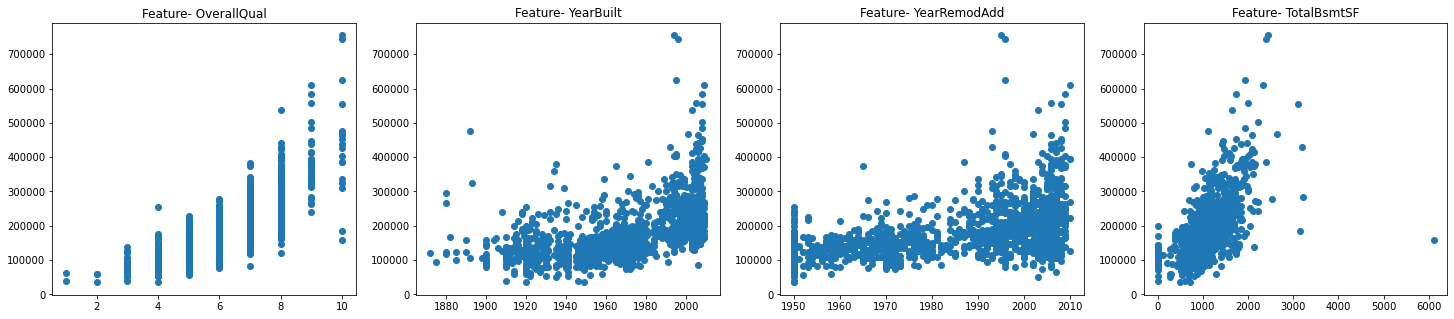

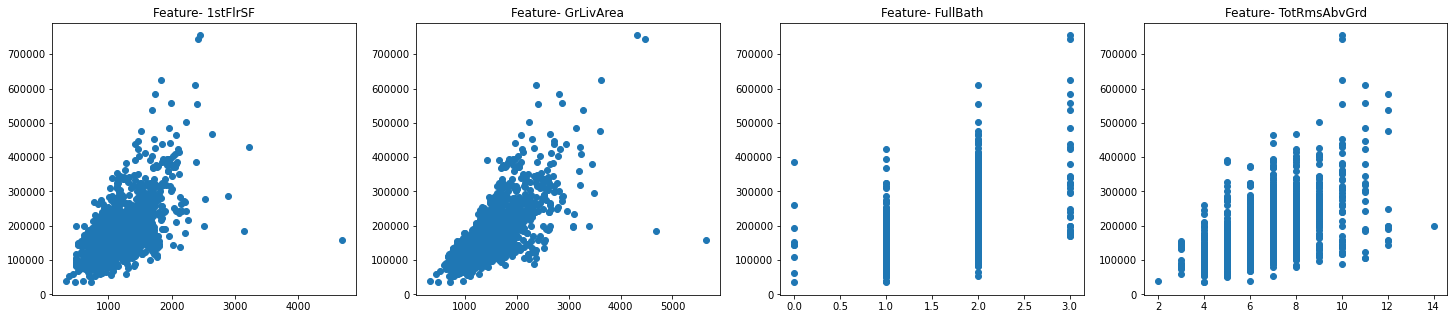

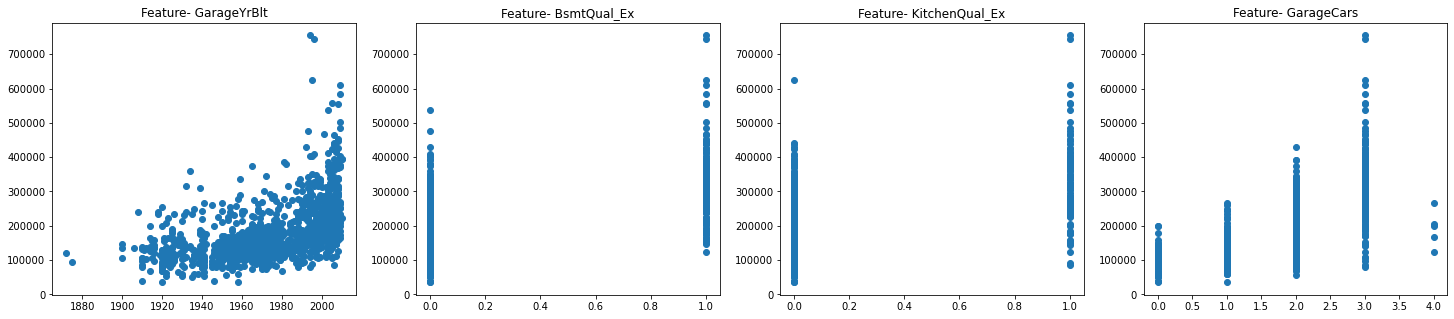

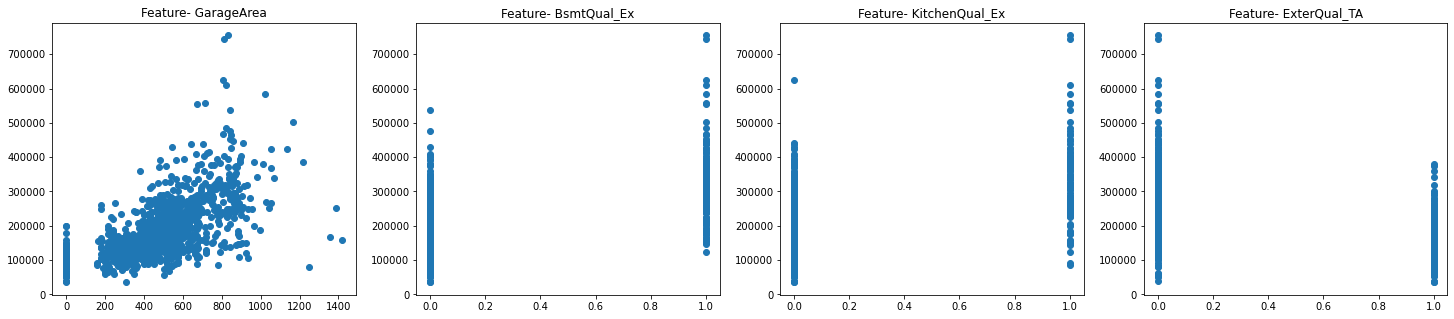

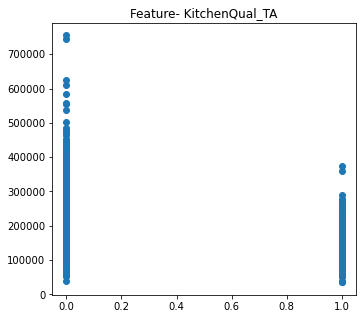

In [792]:
# the code for printing has been take from forums 
# but is used in my own way after editing 
figures_per_time = 4
count = 0 
y = target
print("We have {} features which are highly correlated (more than 0.5 and less than -0.5) to the sale price".format(len(vars)))
for var in vars:
    x = training_data_encoded[var]
#     print(y.shape,x.shape)
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('Feature- {}'.format(var))
    count+=1

Skewness: 1.892297
Kurtosis: 6.562706


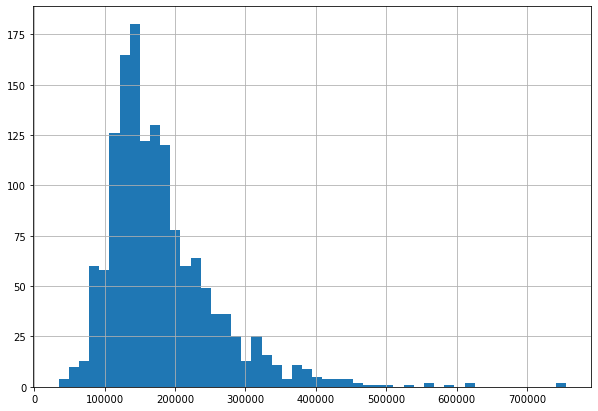

In [793]:
#target 
target.hist(bins=50, figsize=(10,7))
# skewness of the target varible before 
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

In [794]:
# we applied the following processed data and found a really high RMSE value
# so we try to reduce the skewness of SalePrice using "numpy's Log1P"
new_target = np.log1p(target)
y_new = new_target.reset_index(drop=True)

Skewness: 0.155425
Kurtosis: 0.764420


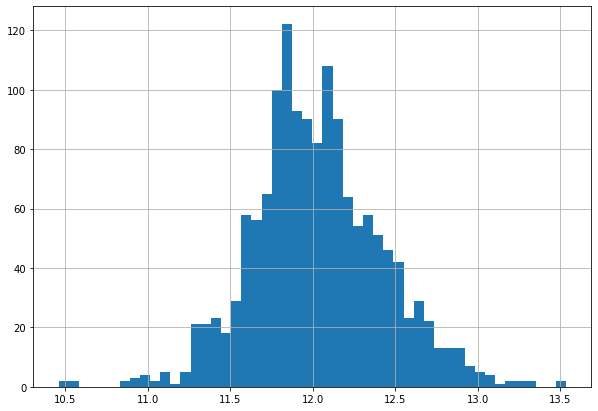

In [795]:
y_new.hist(bins=50, figsize=(10,7))
print("Skewness: %f" % y_new.skew())
print("Kurtosis: %f" % y_new.kurt())

In [796]:
# now we will use this y_value for our testing different models
# for final submission we will use "numpy's expm1" whihc is basically a inverse of Log1P

In [809]:
# here we are passing the encoded features, with unchanged sale price
x_train,x_test,y_train,y_test = train_test_split(training_data_encoded,y_new,test_size=0.3,random_state=0)

In [810]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV 

### The following have directly been applied to check for base performance.
### For Hyper_parameter tuning cross validation results will be consider 

In [822]:
#linear Regression
linear = LinearRegression()
linear.fit(x_train,y_train)
y_predict_linear = linear.predict(x_test)
rmse_linear = np.sqrt(metrics.mean_squared_error(y_test, y_predict_linear))
print('RMSE with Linear Regression =', rmse_linear)

RMSE with Linear Regression = 437797.8005018133


In [812]:
#importing random forest 
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

y_pred_rf = random_forest.predict(x_test)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))

print('RMSE with Random Forest', rmse_rf)

RMSE with Random Forest 0.13323143962703368


In [813]:
##knn
k_nearest_neighbours = KNeighborsRegressor(n_neighbors=3)
k_nearest_neighbours.fit(x_train, y_train)
y_pred_knn = k_nearest_neighbours.predict(x_test)
rmse_knn = np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn))
print('RMSE with KNearestNeighbour', rmse_knn)

RMSE with KNearestNeighbour 0.20765221962754013


In [814]:
#elasticnetCV
elastic = ElasticNetCV()
elastic.fit(x_train, y_train)
y_pred_elastic = elastic.predict(x_test)
rmse_elastic = np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic))
print('RMSE with ElasticNetCV', rmse_elastic)

RMSE with ElasticNetCV 0.16513724508480113


In [815]:
#lasso
lasso = LassoCV()
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('RMSE with Lasso', rmse_lasso)

RMSE with Lasso 0.1651332083710894


In [816]:
#ridge
ridge = RidgeCV()
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
print('RMSE with RidgeCV', rmse_ridge)

RMSE with RidgeCV 0.1187951443808627


In [817]:
# this is the initial run without cross validation 
# high rmse score for linear suggest that it was overfitting
# therefore we use cross validation

In [818]:
Regression_Models = pd.DataFrame({
    'Model': ['Linear Regression ','Random Forest','KNearestNeighbour','ElasticNetCV','Lasso','RidgeCV'],
    'RMSE': [rmse_linear, rmse_rf, rmse_knn, rmse_elastic,rmse_lasso,rmse_ridge]
})
Regression_Models = Regression_Models.sort_values(by='RMSE', ascending=True)
Regression_Models.reset_index(drop=True)


,Model,RMSE
0,RidgeCV,0.118795
1,Random Forest,0.133231
2,Lasso,0.165133
3,ElasticNetCV,0.165137
4,KNearestNeighbour,0.207652
5,Linear Regression,437797.800502


In [819]:
#doing cross validation 
from sklearn.model_selection import cross_val_score
#defining a function for cvval
def cross(model):
    scores = cross_val_score(model, x_train,y_train,
                            scoring="neg_mean_squared_error",cv=10)
    return scores

In [820]:
# storing all our models in a variable 
models = [linear,random_forest,k_nearest_neighbours,elastic,lasso,ridge]

In [821]:
cross_val = pd.DataFrame(columns=['Model', 'RMSE Value'])
for model in models:
    #print(model)
    mean_squared = cross(model)
    mean_squared = -(mean_squared)
    mean_of_all = mean_squared.mean()
    root_mean = np.sqrt(mean_of_all)
    cross_val = cross_val.append({'Model': model, 'RMSE Value': root_mean},ignore_index=True)
    #print("Mean RMSE score for {}".format(model) + " is " + "{}".format(root_mean))
cross_val.sort_values(by='RMSE Value', ascending=True)

,Model,RMSE Value
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.147807
5,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",0.152262
4,LassoCV(),0.206976
3,ElasticNetCV(),0.206980
2,KNeighborsRegressor(n_neighbors=3),0.221604
0,LinearRegression(),591490.460096


In [499]:
#fine tuning our best models (ridge, random forest)
from sklearn.model_selection import GridSearchCV

In [591]:
#extensive tuning was done in this model
# after which these were the best parameter
#some features are commented as these were computationally heavy
# therefore not done again 
param_grid = [
    {'bootstrap' : [False,True],'n_estimators': [100,500,600,700,800,900,1000] , 
     'max_features': ['sqrt','log2','auto']
   #'max_depth':[80, 90, 100, 110,None],'min_samples_leaf': [3, 4, 5],
   # 'min_samples_split': [8, 10, 12]}
    }]

In [592]:
grid_search = GridSearchCV(random_forest,param_grid,cv=3,scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': ['sqrt', 'log2', 'auto'],
                          'n_estimators': [100, 500, 600, 700, 800, 900,
                                           1000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [593]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 900}

In [594]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=900)

In [823]:
random_forest_new =RandomForestRegressor(max_features ='sqrt', n_estimators = 900,bootstrap=False)
random_forest_new.fit(x_train, y_train)
y_pred_rfn = random_forest_new.predict(x_test)
rmse_rfn = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfn))
print('RMSE with Random Forest', rmse_rfn)

RMSE with Random Forest 0.13760770865993482


In [596]:
#Hyper parameter tuning for RidgeCV
param_grid = [{'fit_intercept': [True,False], 'normalize' : [False,True],
                    'gcv_mode':['auto', 'svd', 'eigen'],
                    'store_cv_values':[True,False]
                  }]

In [597]:
grid_search_cv = GridSearchCV(ridge,param_grid,cv=10,scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
             param_grid=[{'fit_intercept': [True, False],
                          'gcv_mode': ['auto', 'svd', 'eigen'],
                          'normalize': [False, True],
                          'store_cv_values': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [598]:
grid_search_cv.best_params_

{'fit_intercept': True,
 'gcv_mode': 'auto',
 'normalize': False,
 'store_cv_values': True}

In [824]:
# it was found that the default values were the best values, so it was left untouched 

In [825]:
predictions_1 = np.expm1(random_forest_new.predict(test_data_encoded))

In [826]:
predictions_2 = np.expm1(ridge.predict(test_data_encoded))

In [827]:
submission_ran_for = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": predictions_1
    })
submission_ran_for.to_csv('submission_rf.csv', index=False)

In [828]:
submission_ridge = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": predictions_2
    })
submission_ridge.to_csv('submission_ridge.csv', index=False)

## Log RMSE value of 0.135, with our best performing model being Ridge
## Kaggle rank 2083 achieved

In [829]:
# thank you 